# **PAVITHRA K (CAN_33683250)**

# **Predicting House Prices**






In [1]:
# Import necessary libraries for data manipulation, visualization, and modeling
import pandas as pd  # for handling datasets
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for statistical data visualization
from sklearn.model_selection import train_test_split  # for splitting the data into training and testing sets
from sklearn.preprocessing import StandardScaler  # for feature scaling (normalization)
from sklearn.metrics import mean_absolute_error, mean_squared_error  # for evaluating model performance
from sklearn.linear_model import LinearRegression  # for building a Linear Regression model
from sklearn.tree import DecisionTreeRegressor  # for building a Decision Tree model
from sklearn.ensemble import RandomForestRegressor  # for building a Random Forest model


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)  # Load dataset as DataFrame



In [3]:
# Convert the dataset into a DataFrame for easier data manipulation
df = pd.DataFrame(housing.data, columns=housing.feature_names)


In [4]:
# Add the target variable (house prices) to the DataFrame
df['PRICE'] = housing.target  # 'PRICE' is the target we're predicting

In [5]:
# Exploratory Data Analysis (EDA) to understand the dataset structure
print("Dataset Info:")
df.info()  # Display information about data types and check for null values

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# Show basic statistical summary for all features
print("\nStatistical Summary:")
print(df.describe())  # Provides mean, standard deviation, min, and max values for numerical features


Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min       

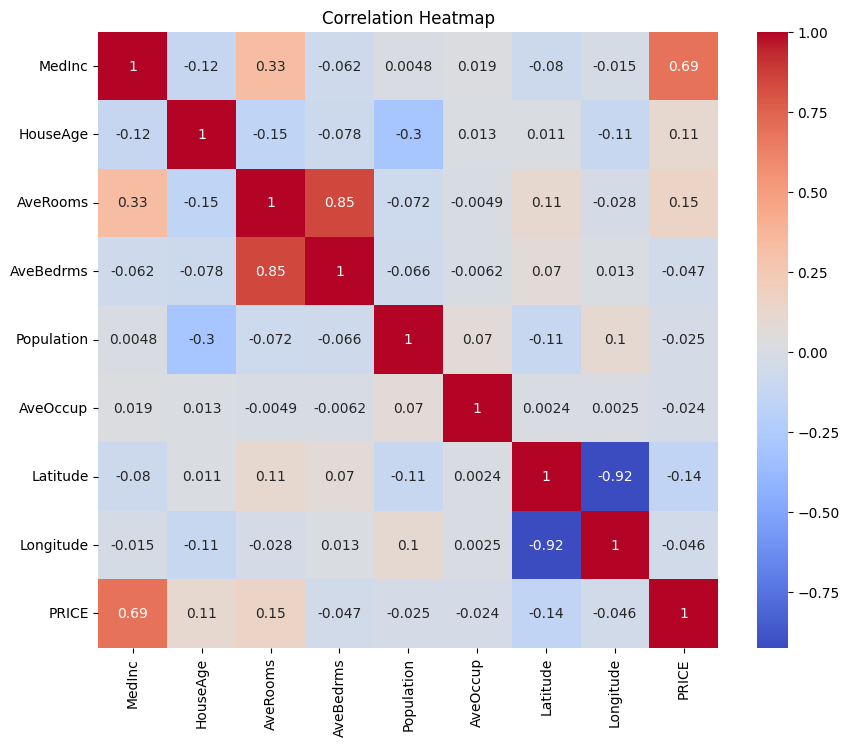

In [7]:

# Correlation heatmap to visualize relationships between features and the target variable
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Display a heatmap of correlations between features
plt.title('Correlation Heatmap')  # Add a title to the heatmap
plt.show()  # Display the plot

**Data** **Preprocessing**

In [9]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())  # Sum up the missing values in each column


Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [10]:
# Fill missing values with the column mean (if there are any missing values)
df.fillna(df.mean(), inplace=True)  # Fill missing values with the mean of the respective column

In [11]:
# Separate the features (X) and the target variable (y)
X = df.drop('PRICE', axis=1)  # Features are all columns except 'PRICE'
y = df['PRICE']  # The target variable is 'PRICE'

In [12]:
# Standardize features to ensure all have the same scale, which improves model performance
scaler = StandardScaler()  # Create a StandardScaler object
X_scaled = scaler.fit_transform(X)  # Fit the scaler to the data and transform it


In [13]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Model Implementation**

In [14]:
# Linear Regression Model
lr = LinearRegression()  # Create a Linear Regression model
lr.fit(X_train, y_train)  # Train the model on the training data
y_pred_lr = lr.predict(X_test)  # Predict house prices on the testing data using Linear Regression

In [15]:
# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)  # Create a Decision Tree model
dt.fit(X_train, y_train)  # Train the model on the training data
y_pred_dt = dt.predict(X_test)  # Predict house prices on the testing data using Decision Tree

In [16]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Create a Random Forest model with 100 trees
rf.fit(X_train, y_train)  # Train the model on the training data
y_pred_rf = rf.predict(X_test)  # Predict house prices on the testing data using Random Forest

**Model** **Evaluation**

In [17]:
# Define a function to evaluate the performance of each model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)  # Calculate Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Calculate Root Mean Squared Error
    print(f"{model_name} Performance:")  # Print the model name
    print(f"Mean Absolute Error (MAE): {mae:.2f}")  # Display MAE
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")  # Display RMSE
    print("\n")

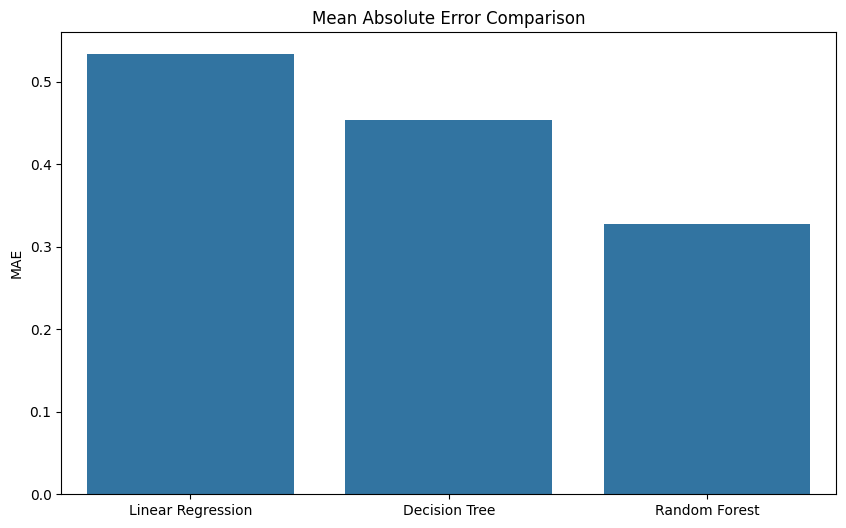

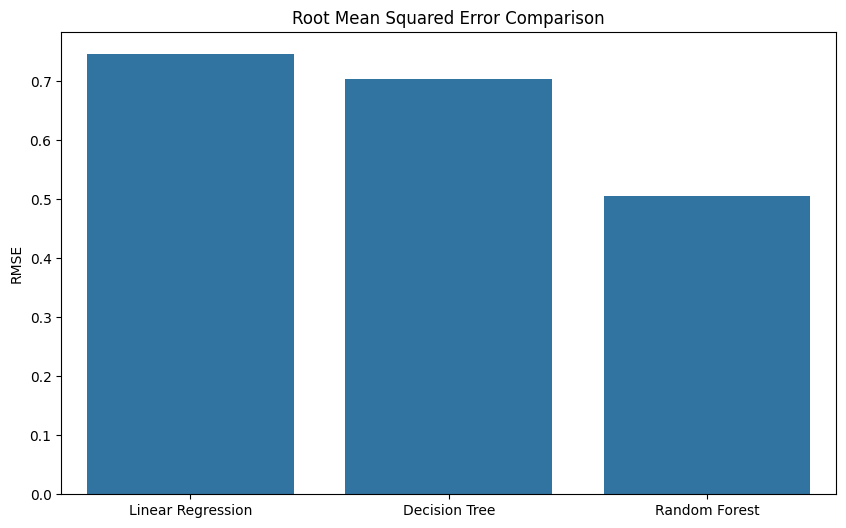

In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mae_scores)
plt.title('Mean Absolute Error Comparison')
plt.ylabel('MAE')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_scores)
plt.title('Root Mean Squared Error Comparison')
plt.ylabel('RMSE')
plt.show()

In [18]:
# Evaluate the Linear Regression model
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate the Decision Tree model
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Evaluate the Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Performance:
Mean Absolute Error (MAE): 0.53
Root Mean Squared Error (RMSE): 0.75


Decision Tree Performance:
Mean Absolute Error (MAE): 0.45
Root Mean Squared Error (RMSE): 0.70


Random Forest Performance:
Mean Absolute Error (MAE): 0.33
Root Mean Squared Error (RMSE): 0.51


